In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_excel("DATOS_IPC.xlsx", parse_dates=['Fecha'], index_col='Fecha')

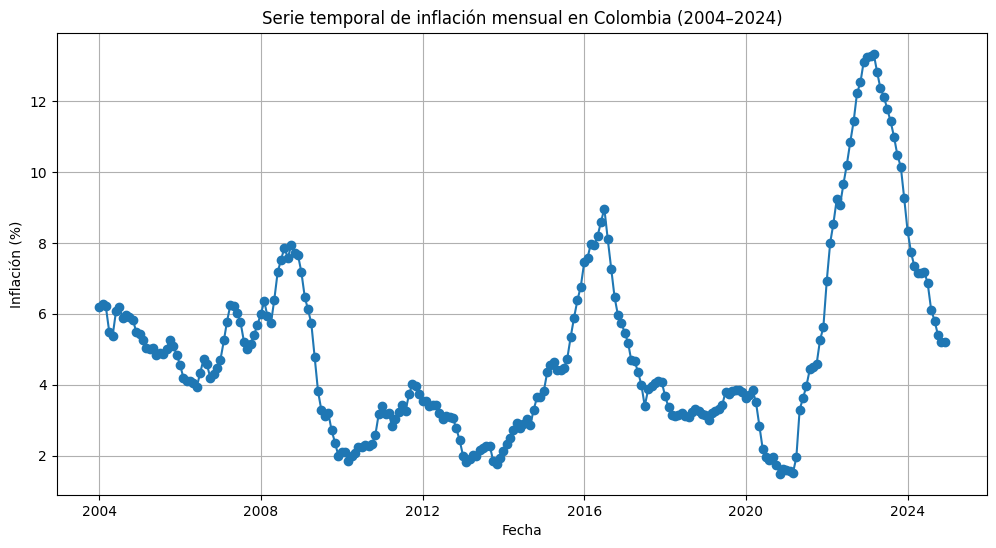

In [3]:
# Visualización
plt.figure(figsize=(12,6))
plt.plot(df['Inflacion'], marker='o', linestyle='-')
plt.title("Serie temporal de inflación mensual en Colombia (2004–2024)")
plt.xlabel("Fecha")
plt.ylabel("Inflación (%)")
plt.grid(True)
plt.savefig("serie_temporal.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
print(df['Inflacion'].describe())

count    252.000000
mean       4.950873
std        2.620979
min        1.490000
25%        3.167500
50%        4.340000
75%        6.040000
max       13.340000
Name: Inflacion, dtype: float64


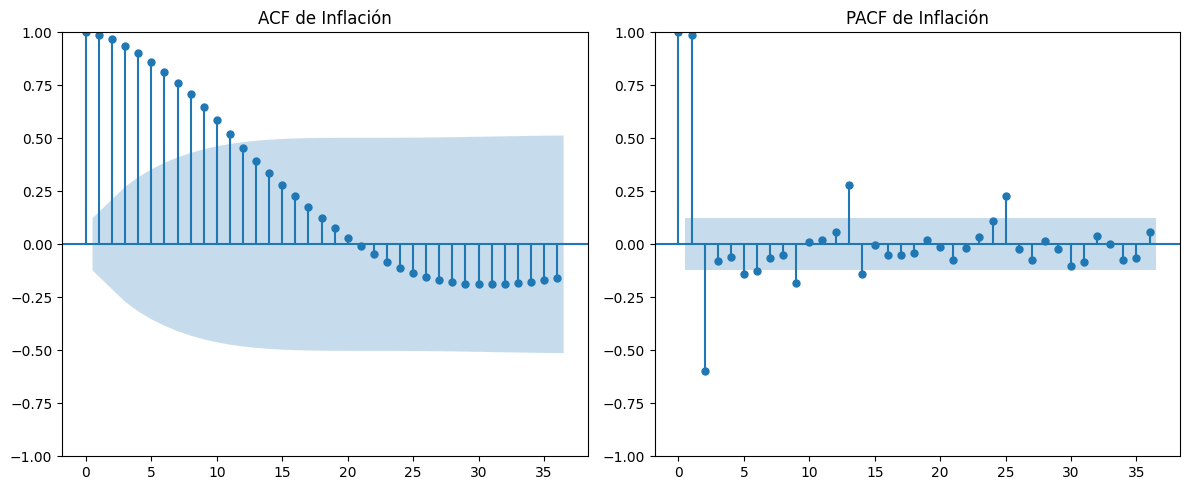

In [5]:
#Gráficos ACF y PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(df['Inflacion'], lags=36, ax=plt.gca())
plt.title("ACF de Inflación")

plt.subplot(1,2,2)
plot_pacf(df['Inflacion'], lags=36, ax=plt.gca())
plt.title("PACF de Inflación")
plt.tight_layout()
plt.savefig("ACF_PACF.png", dpi=300, bbox_inches='tight')
plt.show()

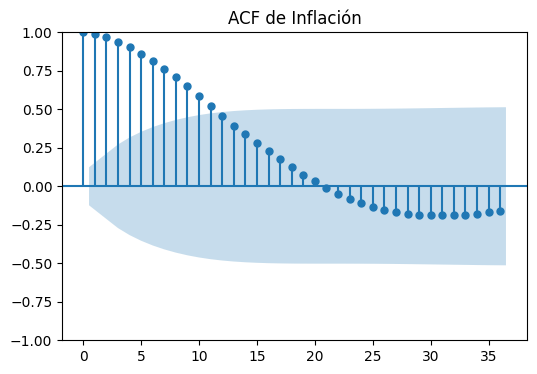

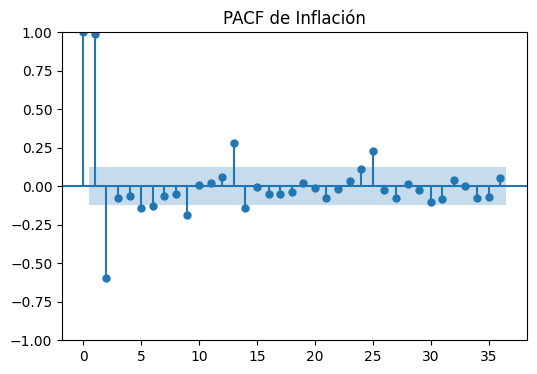

In [6]:
# ACF
fig1, ax1 = plt.subplots(figsize=(6,4))
plot_acf(df['Inflacion'], lags=36, ax=ax1)
ax1.set_title("ACF de Inflación")
fig1.savefig("ACF.png", dpi=300, bbox_inches='tight')
plt.show()

# PACF
fig2, ax2 = plt.subplots(figsize=(6,4))
plot_pacf(df['Inflacion'], lags=36, ax=ax2)
ax2.set_title("PACF de Inflación")
fig2.savefig("PACF.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x900 with 0 Axes>

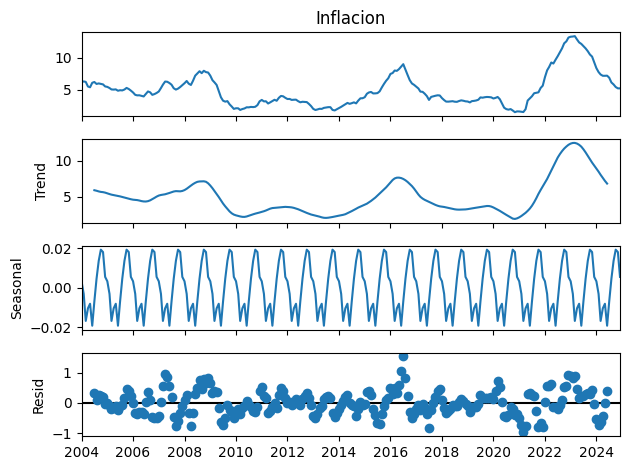

In [7]:
# Descomposición de la serie temporal
df_monthly = df.asfreq('MS') 
decomposition = seasonal_decompose(df_monthly['Inflacion'], model='additive')

plt.figure(figsize=(12,9))
decomposition.plot()
plt.savefig("descomposicion.png", dpi=300, bbox_inches='tight')
plt.show()